In [0]:
devtools::install_github("rstudio/keras")
library(keras)


1. *Normalize images.*
2. *Split the dataset into 500 train /100 validation /100 test. Try to balance the two classes*

In [0]:
pathValidation <- "/content/Valid"
pathTrain <- "/content/Train"
pathTest <- "/content/Test"


library(keras)
library(tensorflow)

#Two class : normal & effusion
num_classes <- 2

#Input image dimensions
img_rows <- 64
img_cols <- 64

#Directory : one subdirectory per class. Every set is balanced with effusion / normal class.
#Target_size : integer vector, default: c(256, 256). The dimensions to which all images found will be resized.
#Class_mode is binary : normal or effusion.
#Color_mode is set as "grayscale" : in this case, we have directly a single chanel.

#Setting up train data set
train_datagen <- image_data_generator(rescale = 1/255)
train_generator <- flow_images_from_directory(
  directory=pathValidation <- pathTrain,
  color_mode = "grayscale",
  target_size = c(img_rows,img_cols),
  batch_size = 25, 
  class_mode = 'binary',
)


#Setting up validation data set
valid_datagen <- image_data_generator(rescale = 1/255)
validation_generator <- flow_images_from_directory(
  directory=pathValidation <- pathValidation,
  color_mode = "grayscale",
  target_size = c(img_rows,img_cols),
  batch_size = 25,
  class_mode = 'binary',
)



**Verification that the images are well loaded.**

In [49]:
#Access to the image/class & verification
batch <- generator_next(train_generator)
#There are for valset 25 image, in 64x64 & 1 chanel for color.
str(batch)
sum(batch[[2]])

List of 2
 $ : num [1:25, 1:64, 1:64, 1] 2 0 0 6 17 14 15 5 10 117 ...
 $ : num [1:25(1d)] 1 1 2 2 2 2 2 2 2 2 ...


[1] 43

**Fitting the model.**

3. *Implement a Convolutional Neural Network (CNN) following the instructions below:*

    • *The number of convolutional layers should not be greater than 6.*

    • *Pooling layers should be included to reduce the number of parameters.*

    • *At the bottom of the network, the fully connected layers will have 128 and 32 nodes respectively.*

    • *Output layer with activation ‘sigmoid’.*

    • *Trainable params should be at least than 60000.*



In [38]:
model <- keras_model_sequential() %>%

#First conv kernel has to contain input_shape which represent the dimension of image in input
layer_conv_2d(filters = 8, kernel_size = c(3, 3), strides = 1, padding = "valid", activation = "relu",input_shape = c(64, 64, 1)) %>%
#Pooling layers to reduce parameter : Downsamples the input representation by taking the maximum value over the window (2,2) 
layer_max_pooling_2d(pool_size = c(2, 2)) %>%

layer_conv_2d(filters = 16, kernel_size = c(3, 3), strides = 1, padding = "valid", activation = "relu") %>%
layer_max_pooling_2d(pool_size = c(2, 2)) %>%

layer_conv_2d(filters = 32, kernel_size = c(3, 3), strides = 1, padding = "valid", activation = "relu") %>%
layer_max_pooling_2d(pool_size = c(2, 2)) %>%

layer_flatten() %>% #prepares a vector for the fully connected layers
layer_dense(units = 128, activation = "relu") %>% #Return max(x,0) for layer 128
layer_dense(units = 32, activation = "relu") %>% #Return max(x,0) for layer 32
layer_dense(units = 1, activation = "sigmoid") # sigmoid(x) = 1 / (1 + exp(-x)) for last layer. Close from 0 for small value, close from 1 for high value (>5).


model %>% compile(
loss = "binary_crossentropy", #Loss function used for a binary problem
optimizer = "adam", #This optimizer is usually a good choice for recurrent neural networks.
metrics = c("acc") #Calculates how often predictions equals labels.
)

summary(model)


Model: "sequential_9"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d_26 (Conv2D)                  (None, 62, 62, 8)               80          
________________________________________________________________________________
max_pooling2d_26 (MaxPooling2D)     (None, 31, 31, 8)               0           
________________________________________________________________________________
conv2d_27 (Conv2D)                  (None, 29, 29, 16)              1168        
________________________________________________________________________________
max_pooling2d_27 (MaxPooling2D)     (None, 14, 14, 16)              0           
________________________________________________________________________________
conv2d_28 (Conv2D)                  (None, 12, 12, 32)              4640        
________________________________________________________________________________
max_po

`geom_smooth()` using formula 'y ~ x'



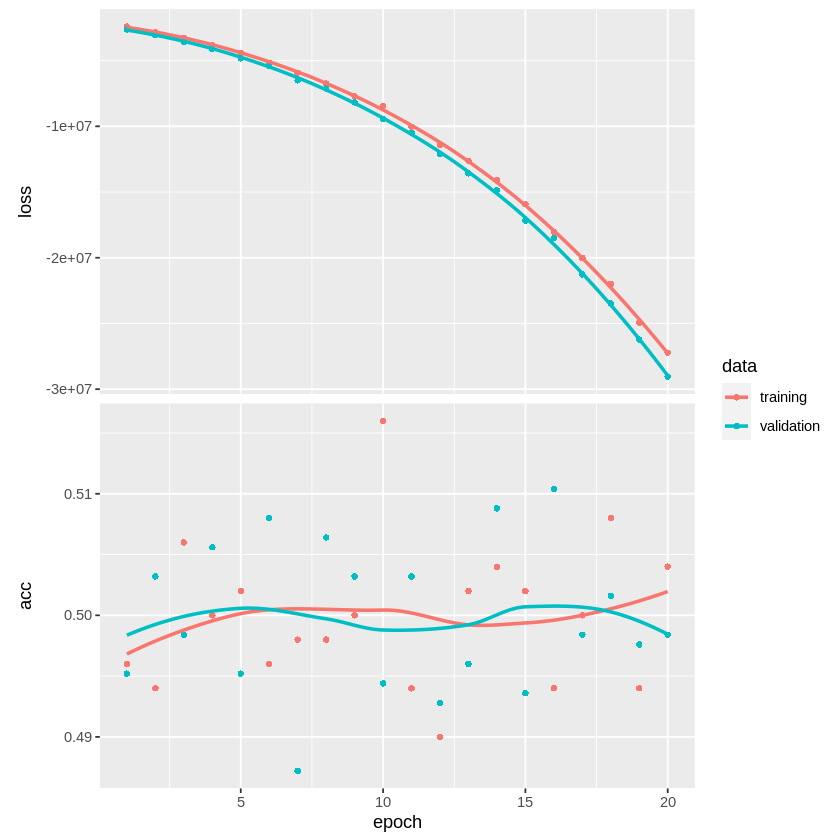

In [37]:
history <- model %>% fit_generator(
  train_generator,
  steps_per_epoch = 20, #equal to 500//25
  epochs = 20,
  validation_data = validation_generator,
  validation_steps = 50,
  verbose = 1
)

plot(history)

In [40]:
history <- model %>% fit_generator(
  train_generator,
  steps_per_epoch = 20,
  epochs = 20,
  validation_data = validation_generator,
  validation_steps = 50,
)

plot(history)

ERROR: ignored